In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad

# Filtering cells

In [2]:
adata = ad.read_h5ad("results/blastocyst_counts.gene_based.gene_name.annotated.h5ad")
print("Before filtering:", adata.shape)
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_cells(adata, min_counts=2000)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.calculate_qc_metrics(adata, inplace=True, log1p=True)
sc.pp.scrublet(adata)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
print("After filtering:", adata.shape)

/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Before filtering: (2661, 28794)
After filtering: (2655, 21489)


In [3]:
sc.pp.highly_variable_genes(adata, n_top_genes=500)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

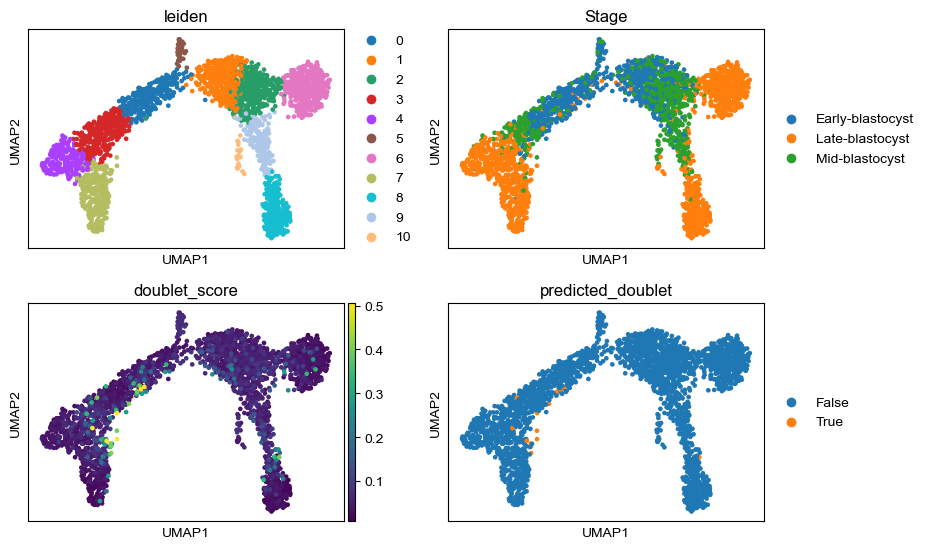

In [4]:
sc.pp.highly_variable_genes(adata, n_top_genes=500)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
with plt.rc_context({"figure.figsize": (4, 3)}):
    sc.pl.umap(adata, color=["leiden", "Stage", "doublet_score", "predicted_doublet"], ncols=2)

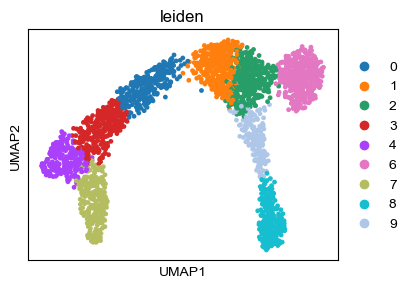

Final cells: 2535


In [5]:
adata1 = adata[(adata.obs["leiden"] != "5") & (adata.obs["leiden"] != "10") & (adata.obs["doublet_score"] < 0.2)]
with plt.rc_context({"figure.figsize": (4, 3)}):
    sc.pl.umap(adata1, color="leiden")
cells = list(sorted(adata1.obs.index))
print("Final cells:", len(cells))

# Filtering cells for gene-based matrix

In [6]:
adata2 = ad.read_h5ad("results/blastocyst_counts.gene_based.gene_name.annotated.h5ad")
print(adata2)
adata2 = adata2[adata2.obs.index.isin(adata1.obs.index),:]
print(adata2)
adata2.write("results/blastocyst_counts.gene_based.gene_name.annotated.filtered.h5ad", compression="gzip")

/home/chenzonggui/miniconda3/envs/py3/lib/python3.10/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2661 × 28794
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group', 'CellLine', 'Stage', 'Platform', 'Label', 'UMI', 'Cells', 'LibStruct', 'Remark', 'Cell.Reads', 'Trimmed.Reads', 'Trimmed.Ratio', 'Mapped.Reads', 'Mapped.Ratio', 'Mito.Ratio', 'Filtered.Reads', 'Filtered.Ratio', 'FilteredClip.Reads', 'FilteredClip.Ratio', 'UMIs', 'UMIs.2Reads', 'Duplicate.Reads', 'Duplicate.Ratio', 'Unique.Reads', 'Genes', 'Isoforms.Assembled', 'Isoforms.Known', 'AC.Ratio', 'AG.Ratio', 'AT.Ratio', 'CA.Ratio', 'CG.Ratio', 'CT.Ratio', 'GA.Ratio', 'GC.Ratio', 'GT.Ratio', 'TA.Ratio', 'TC.Ratio', 'TG.Ratio', 'Pe', 'Pc', 'PcPe.Ratio', 'UMIs.2Reads.Nascent.2TCs', 'UMIs.2Reads.Nascent.2TCs.Ratio', 'Genes.2Reads', 'Genes.2Reads.Nascent.2TCs'
    var: 'GeneID', 'GeneType', 'Chrom', 'Start', 'End', 'Strand'
    layers: 'nascent', 'total'
View of AnnData object with n_obs × n_vars = 2535 × 28794
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group',

# Filtering cells for transcript-based matrix

In [7]:
adata2 = ad.read_h5ad("results/blastocyst_counts.transcript_based.transcript_name.annotated.h5ad")
print(adata2)
adata2 = adata2[adata2.obs.index.isin(adata1.obs.index),:]
print(adata2)
adata2.write("results/blastocyst_counts.transcript_based.transcript_name.annotated.filtered.h5ad", compression="gzip")

AnnData object with n_obs × n_vars = 2661 × 73649
    obs: 'Run', 'Barcode', 'Species', 's4U', 'Time', 'ActD', 'Group', 'CellLine', 'Stage', 'Platform', 'Label', 'UMI', 'Cells', 'LibStruct', 'Remark', 'Cell.Reads', 'Trimmed.Reads', 'Trimmed.Ratio', 'Mapped.Reads', 'Mapped.Ratio', 'Mito.Ratio', 'Filtered.Reads', 'Filtered.Ratio', 'FilteredClip.Reads', 'FilteredClip.Ratio', 'UMIs', 'UMIs.2Reads', 'Duplicate.Reads', 'Duplicate.Ratio', 'Unique.Reads', 'Genes', 'Isoforms.Assembled', 'Isoforms.Known', 'AC.Ratio', 'AG.Ratio', 'AT.Ratio', 'CA.Ratio', 'CG.Ratio', 'CT.Ratio', 'GA.Ratio', 'GC.Ratio', 'GT.Ratio', 'TA.Ratio', 'TC.Ratio', 'TG.Ratio', 'Pe', 'Pc', 'PcPe.Ratio', 'UMIs.2Reads.Nascent.2TCs', 'UMIs.2Reads.Nascent.2TCs.Ratio', 'Genes.2Reads', 'Genes.2Reads.Nascent.2TCs'
    var: 'TranscriptID', 'TranscriptType', 'GeneID', 'GeneName', 'GeneType', 'Chrom', 'Start', 'End', 'Strand'
    layers: 'nascent', 'total'
View of AnnData object with n_obs × n_vars = 2535 × 73649
    obs: 'Run', 'Barcod